### 1. (25 pontos) Realize 100-fold cross validation estratificado na base Skin Segmentation utilizando o classi cador 1-NN com distância Euclidiana então realize os procedimentos abaixo. 

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy import stats

### (a) Mostre a média, o máximo e o mínimo da medida-F. 

In [24]:
def calc_f_measure(classifier):
    list_rates = []
    list_f_measure = []

    for train_index, test_index in skf.split(x,y):
        # TREINO
        x_train = x[train_index]
        y_train = y[train_index]
        # TESTE
        x_test = x[test_index]
        y_test = y[test_index]

        classifier.fit(x_train, y_train)
        rate = classifier.score(x_test, y_test)
        list_rates.append(rate)

        y_pred = classifier.predict(x_test)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        f_measure = ((2*precision*recall)/(precision+recall))
        list_f_measure.append(f_measure)

    average_fMeasure = np.mean(list_f_measure)
    min_fMeasure = min(list_f_measure)
    max_fMeasure = max(list_f_measure)

    print("\n MÉDIA: \n")
    print("%.3f" % average_fMeasure)
    print("\n MÁXIMO: \n")
    print("%.3f" % max_fMeasure)
    print("\n MÍNIMO: \n")
    print("%.3f" % min_fMeasure)

    return list_f_measure, average_fMeasure

In [25]:
list_f_measure, average_fMeasure = calc_f_measure(classifier)


NameError: name 'classifier' is not defined

### (b) Mostre o histograma da medida-F.

In [ ]:
def histogram_f_measure(list_f_measure):
    n_bins = len(list_f_measure)
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].hist(list_f_measure, bins=n_bins)

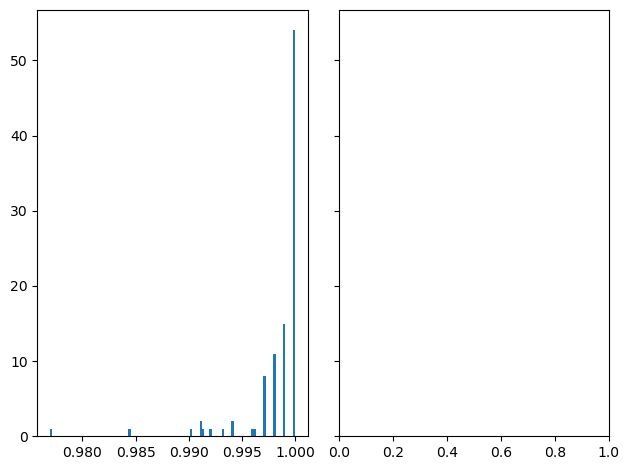

In [ ]:
histogram_f_measure(list_f_measure)

### (c) Calcule o intervalo de confiança da medida-F.

In [ ]:
def calc_confidence_interval(average_fMeasure, list_f_measure):
    desvio_padrao = np.std(list_f_measure)
    
    erro_padrao = desvio_padrao/np.sqrt(len(list_f_measure))

    multiplier = abs(stats.distributions.norm.ppf(0.025))

    confidence_interval = (average_fMeasure - multiplier*erro_padrao, average_fMeasure + multiplier*erro_padrao)
    print("\n INTERVALO DE CONFIANÇA \n")
    print(confidence_interval)

    return confidence_interval

In [ ]:
confidence_interval = calc_confidence_interval(average_fMeasure, list_f_measure)


 INTERVALO DE CONFIANÇA 

(0.997643082377952, 0.9989729820531587)


### (d) Qual a medida-F mínima que você espera ao aplicar este classificador, sob as mesmas condições de treinamento, para dados nunca vistos?

O valor minimo do intervalo de confiança: 0.997643082377952

### (e) Qual a medida-F esperada para o classificador quando aplicada a dados nunca antes vistos. 


Valores dentro do intervalo de confiança: (0.997643082377952, 0.9989729820531587)

### 2. (25 pontos) Realize um experimento pareado com 100 repetições de Holdout 50/50 utilizando o classi cador 1-NN com distância Euclidiana. Utilize duas versões da base Wine archive. ics.uci.edu/ml/datasets/Wine para este experimento, a primeira versão é a base original, a segunda versão é a base sem a última coluna. Após calcular 100 taxas de acero para cada uma das versões da base, realize os procedimentos abaixo. 


In [38]:
names_columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df2 = pd.read_csv("wine_v2.data", names=names_columns)

# v1
y = np.array(df2[df2.columns[:1:]]).flatten()
# v2
y2 = df2[df2.columns[:1:]]


In [32]:
def calcular_taxas_removendo_colunas(dataframe, qtd_colunas_retiradas, qtd_taxas, porcent_test):
    arrays = []
    colunas = len(dataframe.columns)-1
    classificador = KNeighborsClassifier(n_neighbors=1)
    for n in range(qtd_colunas_retiradas):
        array_taxas = []
        x = (dataframe[dataframe.columns[1:colunas:]])
        colunas -= 1
        for i in range(qtd_taxas):
            x_treino, x_teste, y_treino, y_teste = train_test_split (x, y,test_size=porcent_test, random_state=i)
            classificador.fit(x_treino, y_treino)
            taxas = classificador.score(x_teste, y_teste)
            array_taxas.append(taxas)

        arrays.append(array_taxas)

    return arrays

arrays_taxas = calcular_taxas_removendo_colunas(df2, 2, 100, 0.5)


In [33]:
def calcular_todas_diferencas(arrays):
    hash_diferencas_total = {}
    array_diferencas_atual = []
    array_diferencas_local = []

    cont = 1
    for x in range(len(arrays)-1):
        for p in range(len(arrays)-1):
            for y in range(len(arrays[p])):
                if p >= x:
                    array_diferencas_atual.append(arrays[x][y] - arrays[p+1][y])
            if array_diferencas_atual not in array_diferencas_local:
                if array_diferencas_atual:
                    array_diferencas_local.append(array_diferencas_atual)
            array_diferencas_atual = []
        hash_diferencas_total[x+1] = array_diferencas_local
        array_diferencas_local = []
    
    return hash_diferencas_total

hash_diferencas_total = calcular_todas_diferencas(arrays_taxas)

print(hash_diferencas_total)

{1: [[0.022471910112359605, 0.0, 0.011235955056179803, 0.03370786516853941, 0.011235955056179803, 0.011235955056179803, 0.0337078651685393, 0.022471910112359494, 0.022471910112359494, 0.011235955056179692, 0.022471910112359494, 0.0, 0.0337078651685393, 0.0561797752808989, 0.011235955056179803, 0.011235955056179692, 0.022471910112359605, 0.011235955056179692, 0.011235955056179692, 0.0337078651685393, 0.011235955056179803, 0.022471910112359605, 0.0, 0.0, 0.011235955056179803, 0.022471910112359605, -0.011235955056179803, 0.011235955056179803, 0.011235955056179803, 0.011235955056179803, 0.0, 0.022471910112359494, 0.011235955056179803, 0.022471910112359605, -0.011235955056179803, 0.011235955056179692, 0.022471910112359494, 0.022471910112359494, 0.011235955056179803, 0.022471910112359494, 0.0, -0.011235955056179803, 0.0, 0.011235955056179803, 0.011235955056179803, 0.011235955056179803, 0.022471910112359605, 0.0, 0.022471910112359494, 0.011235955056179803, 0.022471910112359494, 0.022471910112

In [34]:
def calcular_todas_medias(array_diferencas_total):
    hash_media_total = {}
    array_media_atual = []
    soma_total = 0

    for i in range(len(array_diferencas_total)):
        for j in range(len(array_diferencas_total[i+1])):
            for u in array_diferencas_total[i+1][j]:
                soma_total += u
            media = soma_total / len(array_diferencas_total[i+1][j])
            array_media_atual.append(media)
            soma_total = 0
        hash_media_total[i+1] = array_media_atual
        array_media_atual = []
    
    return hash_media_total

hash_media_total = calcular_todas_medias(hash_diferencas_total)
print(hash_media_total)

{1: [0.013595505617977528]}


In [36]:
def calcular_intervalo_confianca(hash_medias, hash_diferencas_total):
    for i in range(len(hash_medias)):
        for x in range(len(hash_medias[i+1])):
            
            desvio_padrao = np.std(hash_diferencas_total[i+1][x])
            
            erro_padrao = desvio_padrao/np.sqrt(len(hash_diferencas_total[i+1][x]))

            multiplicador = abs(stats.distributions.norm.ppf(0.025))

            print(i+1, (hash_medias[i+1][x] - multiplicador*erro_padrao, hash_medias[i+1][x] + multiplicador*erro_padrao)
            )
calcular_intervalo_confianca(hash_media_total, hash_diferencas_total)

1 (0.01119732372881338, 0.015993687507141675)


In [ ]:
def calcular_medias_separadas(array):
    hash_saida = {}
    array_aux = []
    for x in range(len(array)):  
        array_aux.append(np.mean(array[x]))          
        hash_saida[x+1] = array_aux
        array_aux = []
    return hash_saida

medias_separadas = calcular_medias_separadas(arrays_taxas)

hash_taxas = {}
array_aux = []
for x in range(len(arrays_taxas)):
    array_aux.append(arrays_taxas[x])
    hash_taxas[x+1] = array_aux
    array_aux = []

calcular_intervalo_confianca(medias_separadas, hash_taxas)

1 (0.8252175672280455, 0.8399509720977969)
2 (0.8112722681354767, 0.8267052599544105)


3. (25 pontos) Qual o número máximo de características que podem ser removidas da base Iris archive.ics.uci.edu/ml/datasets/iris sem reduzir significativamente a taxa de acerto? De na a metodologia utilizada para justificar sua resposta. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
nomes_col = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class' ]
df = pd.read_csv("data/iris.data", names=nomes_col)

In [ ]:
y = np.array(df[df.columns[-1::]]).flatten()

h = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

y2 = df[df.columns[-1::]]

for classe in range(len(y)):
    y[classe] = int(h[y[classe]])

y = y.astype(np.int64)

In [ ]:
def calcular_taxas_removendo_colunas(dataframe, qtd_colunas_retiradas, qtd_taxas, porcent_test):
    arrays = []
    colunas = len(dataframe.columns)-1
    classificador = KNeighborsClassifier(n_neighbors=1)
    for n in range(qtd_colunas_retiradas):
        array_taxas = []
        x = (dataframe[dataframe.columns[0:colunas:]])
        colunas -= 1
        for i in range(qtd_taxas):
            x_treino, x_teste, y_treino, y_teste = train_test_split (x, y,test_size=porcent_test, random_state=i)
            classificador.fit(x_treino, y_treino)
            taxas = classificador.score(x_teste, y_teste)
            array_taxas.append(taxas)

        arrays.append(array_taxas)

    return arrays

In [ ]:
qtd_colunas = len(df.columns)-1
arrays_taxas = calcular_taxas_removendo_colunas(df,qtd_colunas, 30, 0.5)
arrays_taxas

In [ ]:
def calcular_intervalo_confianca(hash_medias, hash_diferencas_total):
    for i in range(len(hash_medias)):
        for x in range(len(hash_medias[i+1])):
            
            desvio_padrao = np.std(hash_diferencas_total[i+1][x])
            
            erro_padrao = desvio_padrao/np.sqrt(len(hash_diferencas_total[i+1][x]))

            multiplicador = abs(stats.distributions.norm.ppf(0.025))

            print(i+1, (hash_medias[i+1][x] - multiplicador*erro_padrao, hash_medias[i+1][x] + multiplicador*erro_padrao)
            )

In [ ]:
def calcular_medias_separadas(array):

    hash_saida = {}
    array_aux = []
    for x in range(len(array)):  
        array_aux.append(np.mean(array[x]))          
        hash_saida[x+1] = array_aux
        array_aux = []
    return hash_saida

In [ ]:
medias_separadas = calcular_medias_separadas(arrays_taxas)

hash_taxas = {}
array_aux = []
for x in range(len(arrays_taxas)):
    array_aux.append(arrays_taxas[x])
    hash_taxas[x+1] = array_aux
    array_aux = []

calcular_intervalo_confianca(medias_separadas, hash_taxas)

4. (25 pontos) Utilizando o classificador k-NN na base Wine archive.ics.uci.edu/ml/datasets/ Wine, teste os valores k = 1, . . . , 15. Para qual valor de k o classi cador apresenta uma taxa de acerto significativamente maior? De na a metodologia utilizada para justificar sua resposta. 

In [ ]:
nomes_col = ['Class', 'Alcohol', 'Malic acid','Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity','Hue','OD280/OD315 of diluted wines','Proline',]

df = pd.read_csv("data/wine.data", names=nomes_col)

In [ ]:
x = np.array(df[df.columns[1:13:]])
x2 = df[df.columns[1:13:]]

y = np.array(df[df.columns[:1:]]).flatten()
y2 = df[df.columns[:1:]]

In [ ]:
def calcular_taxas_para_knn(k, qtd_taxas, porcent_test):
    array_taxas = []

    for n in range(k):
        arrays = []
        for i in range(qtd_taxas):
            x_treino, x_teste, y_treino, y_teste = train_test_split (x, y,test_size=porcent_test, random_state=i)
            classificador = KNeighborsClassifier(n_neighbors=n+1)
            classificador.fit(x_treino, y_treino)
            taxas = classificador.score(x_teste, y_teste)
            arrays.append(taxas)

        array_taxas.append(arrays)
        
    return array_taxas

array_taxas = calcular_taxas_para_knn(15, 30, 0.5)

In [ ]:
def calcular_intervalo_confianca(hash_medias, hash_diferencas_total):
    for i in range(len(hash_medias)):
        for x in range(len(hash_medias[i+1])):
            
            std = np.std(hash_diferencas_total[i+1][x])

            desvio_padrao = std/np.sqrt(len(hash_diferencas_total[i+1][x]))

            multiplicador = abs(stats.distributions.norm.ppf(0.025))

            print("int_conf: ", i+1,(hash_medias[i+1][x] - multiplicador*desvio_padrao, hash_medias[i+1][x] + multiplicador*desvio_padrao)
            )

In [ ]:
def calcular_medias_separadas(array):

    hash_saida = {}
    array_aux = []
    for x in range(len(array)):  
        array_aux.append(np.mean(array[x]))          
        hash_saida[x+1] = array_aux
        array_aux = []
    return hash_saida


In [ ]:
medias_separadas = calcular_medias_separadas(array_taxas)

hash_taxas = {}
array_aux = []

for x in range(len(array_taxas)):
    array_aux.append(array_taxas[x])
    hash_taxas[x+1] = array_aux
    array_aux = [] 

calcular_intervalo_confianca(medias_separadas, hash_taxas)